In [82]:
import matplotlib.pyplot as plt
from synthetic_information_spread_experiments import ExperimentResult
import networkx as nx

with open("../results/synthetic_5_bdi_is.json", "r") as f:
    result5 = ExperimentResult.model_validate_json(f.read())
with open("../results/synthetic_5_bdi_is_reduced.json", "r") as f:
    result5_reduced = ExperimentResult.model_validate_json(f.read())
with open("../results/synthetic_5_bdi_is_reduced_prompt.json", "r") as f:
    result5_reduced_prompt = ExperimentResult.model_validate_json(f.read())
with open("../results/synthetic_5_bdi_is_simple.json", "r") as f:
    result5_simple = ExperimentResult.model_validate_json(f.read())

with open("../results/synthetic_10_bdi_is.json", "r") as f:
    result10 = ExperimentResult.model_validate_json(f.read())

with open("../results/synthetic_25_bdi_is.json", "r") as f:
    result25 = ExperimentResult.model_validate_json(f.read())

In [83]:
def get_networkx_name_graph(result: ExperimentResult):
    G = nx.Graph()
    G.add_edges_from(
        (
            (result.dataset.agents[u].full_name, result.dataset.agents[v].full_name)
            for (u, v) in result.dataset.edges
        )
    )
    return G


result5_graph = get_networkx_name_graph(result5)

result10_graph = get_networkx_name_graph(result10)

result25_graph = get_networkx_name_graph(result25)

In [ ]:
result5_pos = nx.spring_layout(result5_graph)
result10_pos = nx.spring_layout(result10_graph)
result25_pos = nx.spring_layout(result25_graph)


def process_experiment(result: ExperimentResult, graph: nx.Graph, pos):
    # print plot on the number of agents knowing the answer
    x = list(range(len(result.epoch_agents_responses)))
    y_overall = [
        sum(1 for response in epoch if response.final_answer)
        for epoch in result.epoch_agents_responses
    ]
    plt.bar(x, y_overall, color="skyblue")
    plt.xlabel("Epoch")
    plt.ylabel("Number of Agents Knowing the Answer")
    plt.title(
        f"Number of Agents Knowing the Answer Over Epochs - {len(result.dataset.agents)} Agents"
    )
    plt.xticks(x, [f"{i + 1}" for i in x])
    plt.show()

    # print plot on unique agents knowing the information
    # disregarding the memory forgetting
    unique_agents = set[int]()

    def expand_unique(epoch_responses: set[int]):
        nonlocal unique_agents
        unique_agents |= epoch_responses
        return unique_agents

    y_unique = [
        len(expand_unique({i for i, answer in enumerate(epoch) if answer.final_answer}))
        for epoch in result.epoch_agents_responses
    ]
    plt.bar(x, y_unique, color="lightgreen")
    plt.xlabel("Epoch")
    plt.ylabel("Unique Agents Knowing the Answer")
    plt.title(
        f"Unique Agents Knowing the Answer Over Epochs - {len(result.dataset.agents)} Agents"
    )
    plt.xticks(x, [f"{i + 1}" for i in x])
    plt.show()

    for epoch in range(len(result.epoch_agents_responses)):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        nx.draw(
            graph,
            pos=pos,
            with_labels=True,
            node_size=500,
            node_color="lightblue",
            font_size=10,
            font_color="black",
            edge_color="gray",
        )
        plt.title(
            f"{len(result.dataset.agents)} Agents - Information Spread - Epoch {epoch + 1}"
        )
        # mark some node with red color
        for node_id, answer in enumerate(result.epoch_agents_responses[epoch]):
            if answer.final_answer:
                nx.draw_networkx_nodes(
                    graph,
                    pos=pos,
                    nodelist=[result.dataset.agents[node_id].full_name],
                    node_color="red",
                    node_size=500,
                )
        plt.show()

In [85]:
def get_information_about_dataset_result(experiment: ExperimentResult, graph: nx.Graph):
    # gets basic information about the dataset
    seed_node_id = experiment.dataset.information_seed_agent
    seed_node = experiment.dataset.agents[seed_node_id]
    seed_node_centrality = nx.degree_centrality(graph)[seed_node.full_name]
    seed_node_degree = graph.degree(seed_node.full_name)  # type: ignore
    avg_degree = sum(dict(graph.degree()).values()) / len(graph.nodes()) # type: ignore
    num_agents = len(experiment.dataset.agents)
    num_edges = len(experiment.dataset.edges)
    prompt_processing_time = experiment.total_time
    num_epochs = len(experiment.epoch_agents_responses)
    num_utterances = sum(len(epoch) for epoch in experiment.epoch_agents_responses)
    # Finance-related information
    prompt_tokens = experiment.prompt_tokens
    completion_tokens = experiment.completion_tokens
    requests = experiment.total_requests

    print(
        f"Seed Node: {seed_node.full_name} (ID: {seed_node_id})\n"
        f"Centrality: {seed_node_centrality:.4f}\n"
        f"Degree of seed node: {seed_node_degree}\n"
        f"Average Degree: {avg_degree:.2f}\n"
        f"Number of Agents: {num_agents}\n"
        f"Number of Edges: {num_edges}\n"
        f"Prompt Processing Time: {prompt_processing_time:,.2f} seconds\n"
        f"Number of Epochs: {num_epochs}\n"
        f"Number of Utterances: {num_utterances}"
        f"\nTotal Tokens: {prompt_tokens:,}\n"
        f"Total Completion Tokens: {completion_tokens:,}\n"
        f"Average Tokens per Request: {prompt_tokens / requests:.2f}\n"
        f"Average Completion Tokens per Request: {completion_tokens / requests:.2f}\n"
        f"Tokens per Second: {completion_tokens / prompt_processing_time:.2f} TPS\n"
        f"Total Requests: {requests}\n"
    )

## Base 5 nodes experiments


In [86]:
get_information_about_dataset_result(result5, result5_graph)

Seed Node: Emily Johnson (ID: 0)
Centrality: 0.7500
Degree of seed node: 3
Average Degree: 2.40
Number of Agents: 5
Number of Edges: 6
Prompt Processing Time: 1,426.42 seconds
Number of Epochs: 20
Number of Utterances: 100
Total Tokens: 2,368,727
Total Completion Tokens: 158,048
Average Tokens per Request: 2454.64
Average Completion Tokens per Request: 163.78
Tokens per Second: 110.80 TPS
Total Requests: 965



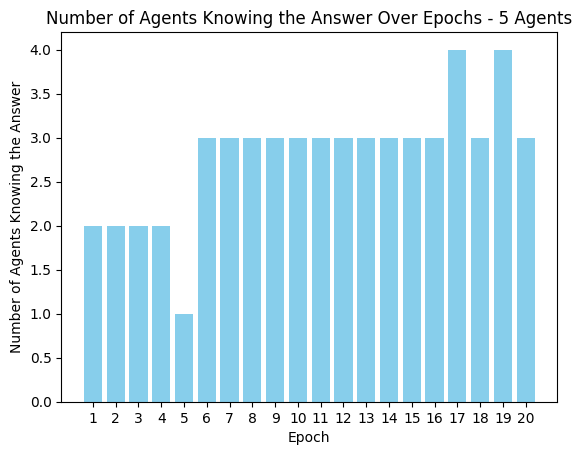

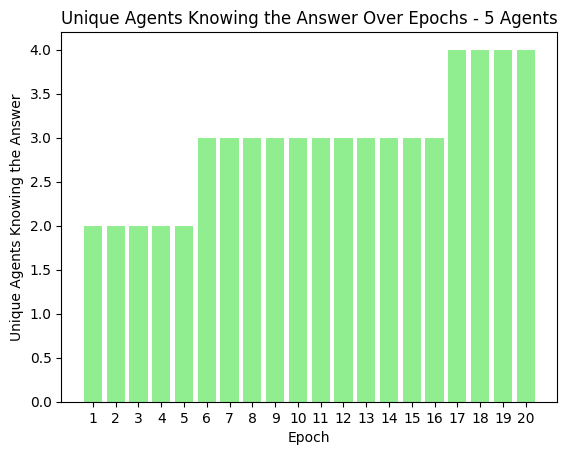

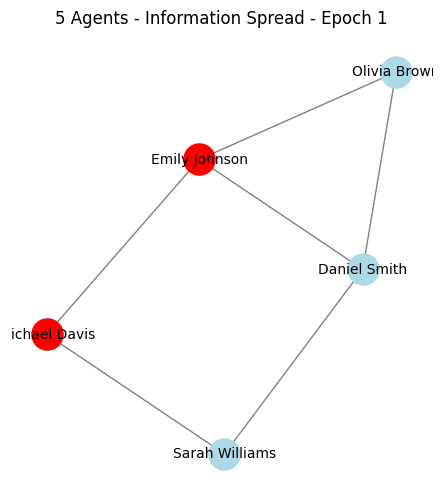

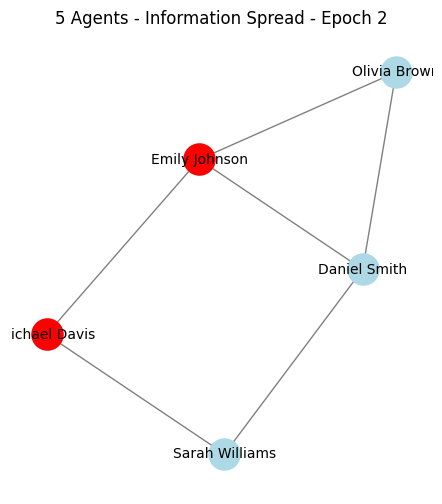

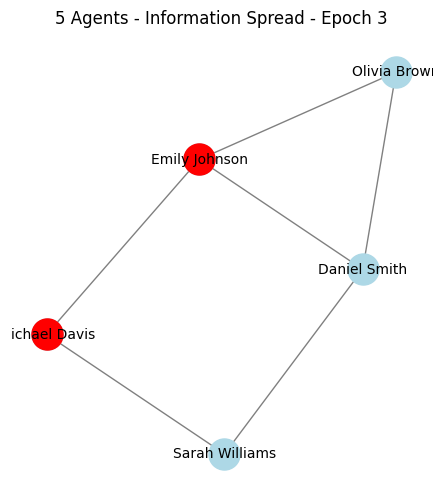

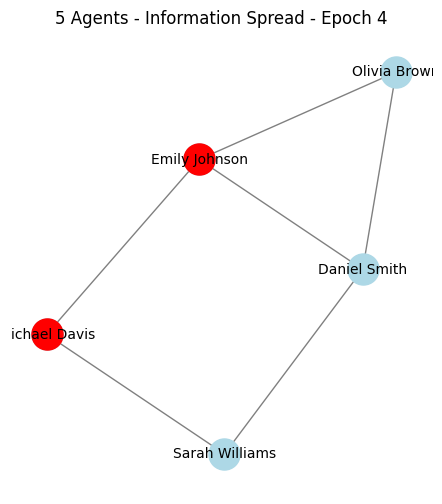

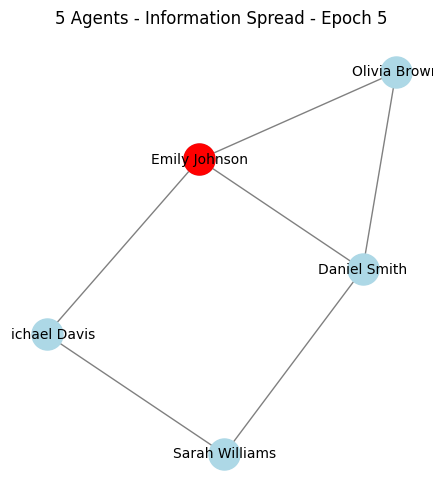

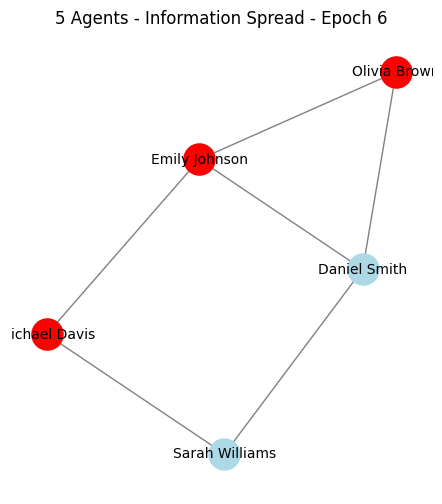

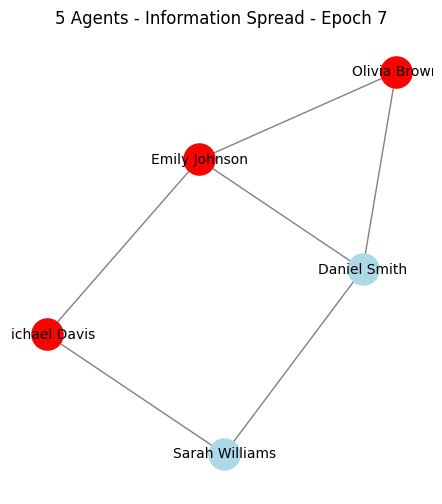

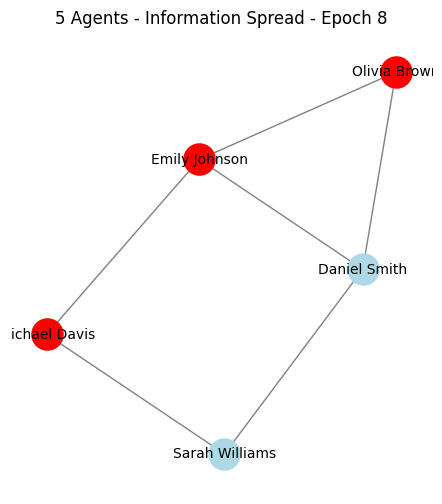

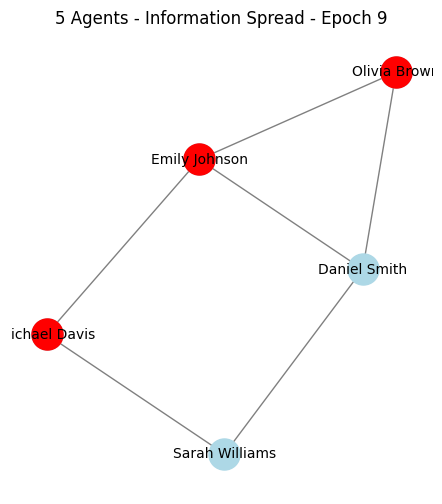

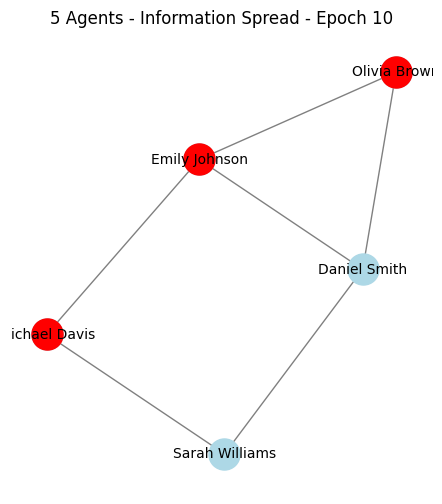

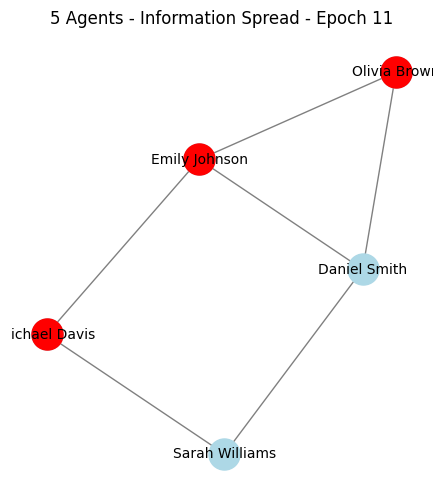

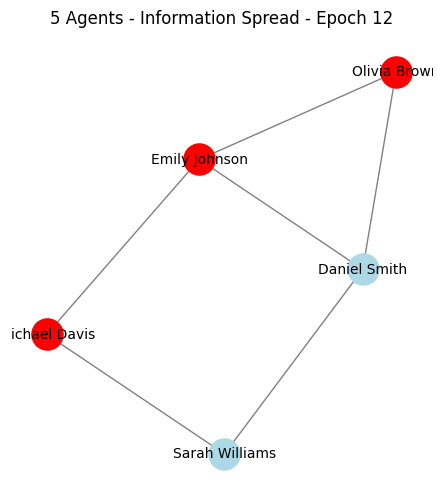

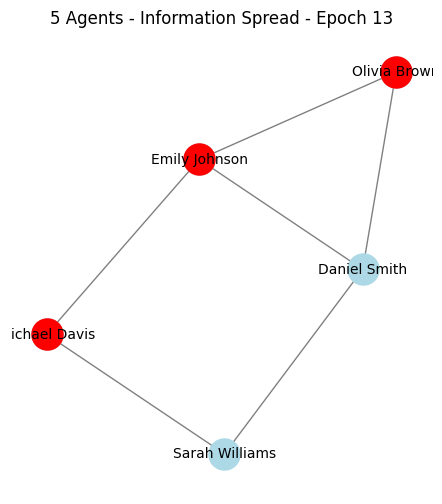

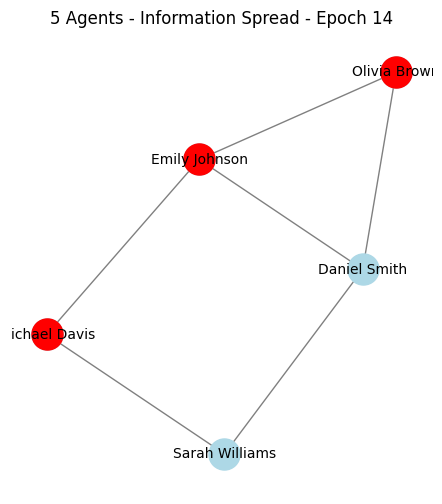

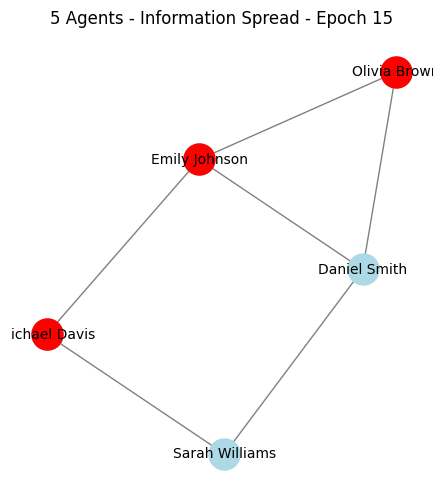

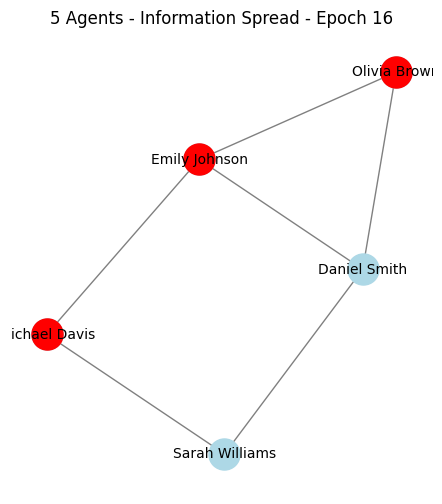

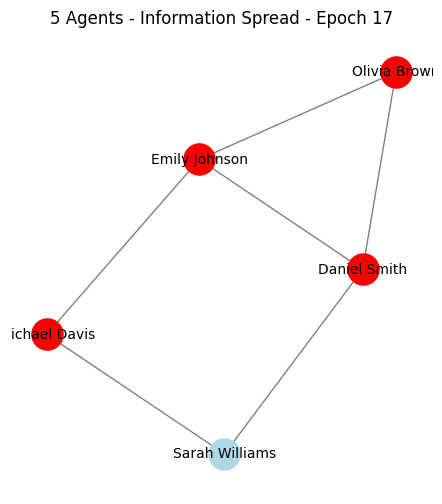

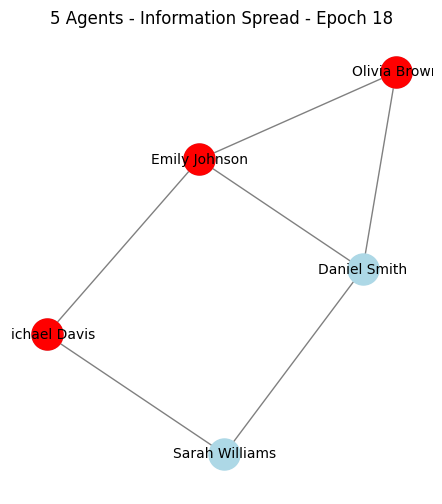

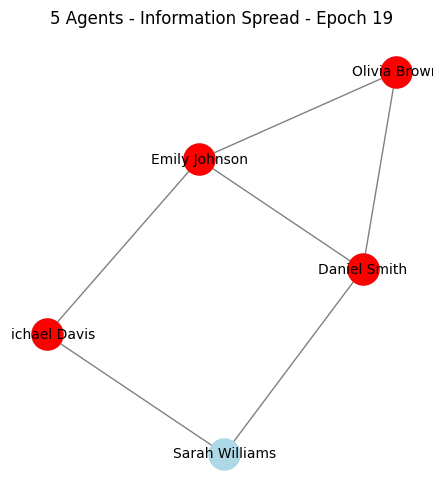

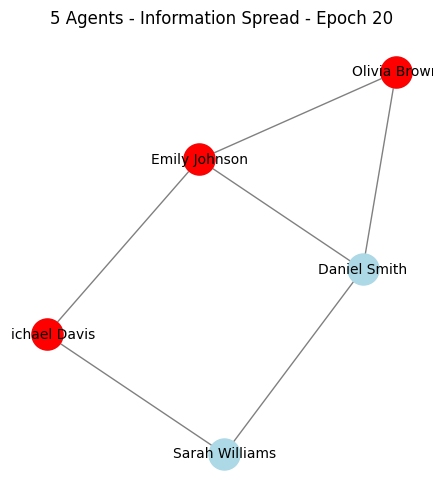

In [87]:
process_experiment(result5, result5_graph, result5_pos)

# 5 agents - reduced amount of utterances and epochs


In [88]:
get_information_about_dataset_result(result5_reduced, result5_graph)

Seed Node: Emily Johnson (ID: 0)
Centrality: 0.7500
Degree of seed node: 3
Average Degree: 2.40
Number of Agents: 5
Number of Edges: 6
Prompt Processing Time: 9,394.42 seconds
Number of Epochs: 10
Number of Utterances: 50
Total Tokens: 582,873
Total Completion Tokens: 49,122
Average Tokens per Request: 1815.80
Average Completion Tokens per Request: 153.03
Tokens per Second: 5.23 TPS
Total Requests: 321



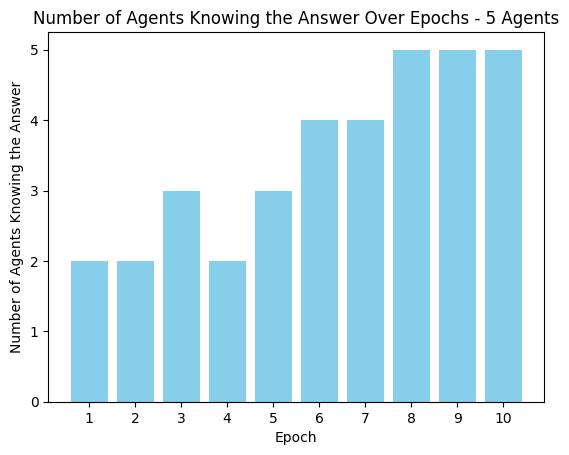

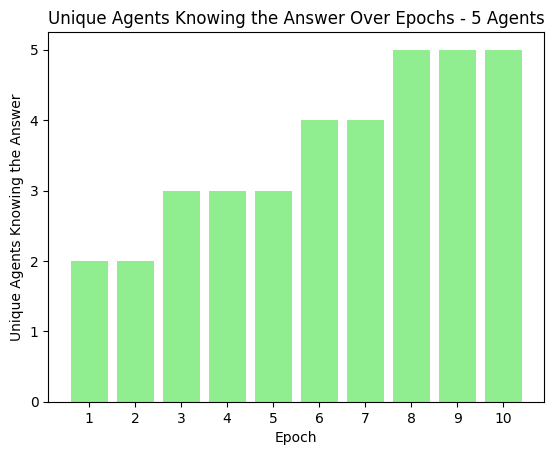

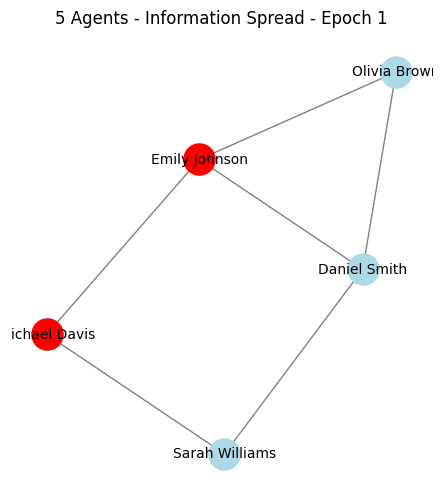

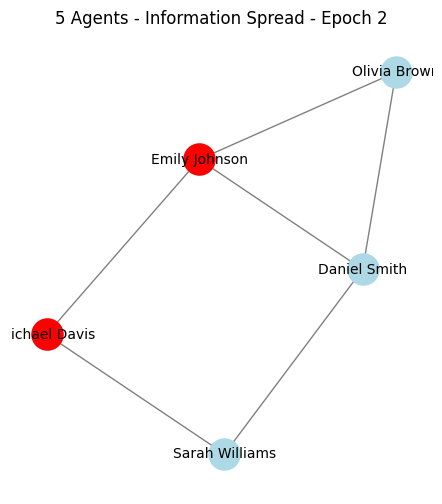

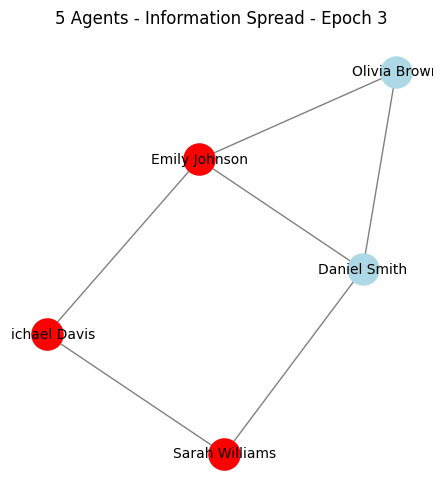

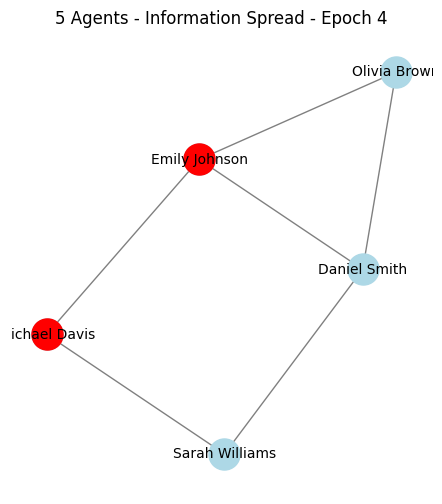

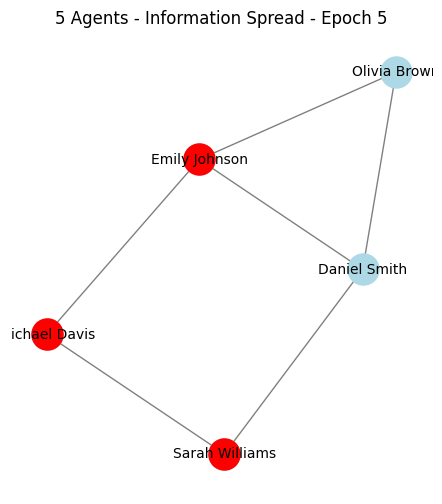

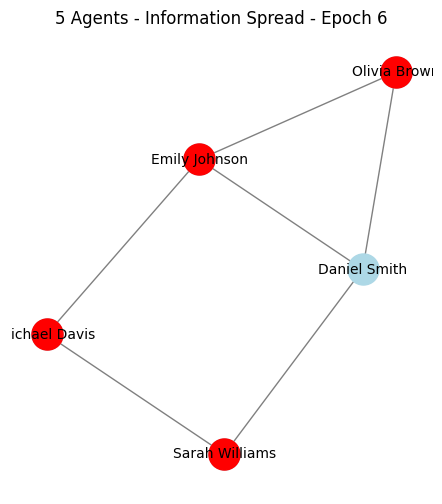

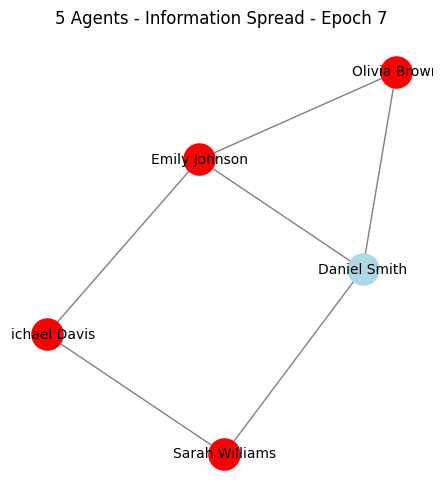

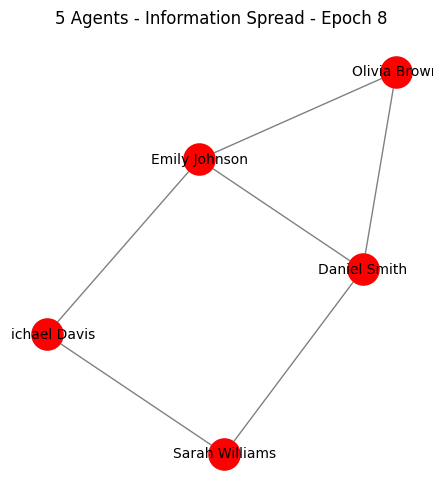

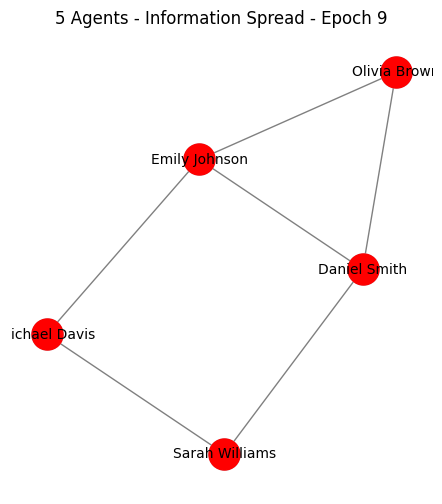

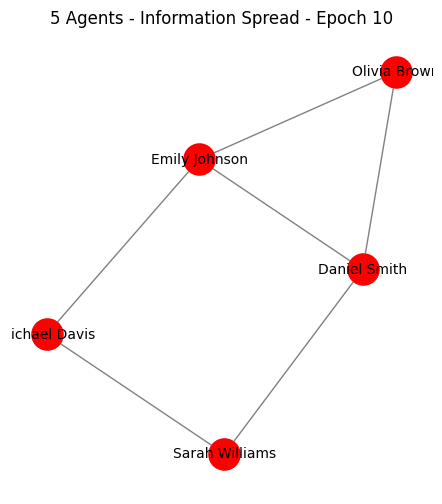

In [89]:
process_experiment(result5_reduced, result5_graph, result5_pos)

## 5 agents - altered prompt to reduce information spread


In [90]:
get_information_about_dataset_result(result5_reduced_prompt, result5_graph)

Seed Node: Emily Johnson (ID: 0)
Centrality: 0.7500
Degree of seed node: 3
Average Degree: 2.40
Number of Agents: 5
Number of Edges: 6
Prompt Processing Time: 1,388.55 seconds
Number of Epochs: 20
Number of Utterances: 100
Total Tokens: 1,911,481
Total Completion Tokens: 138,201
Average Tokens per Request: 1989.05
Average Completion Tokens per Request: 143.81
Tokens per Second: 99.53 TPS
Total Requests: 961



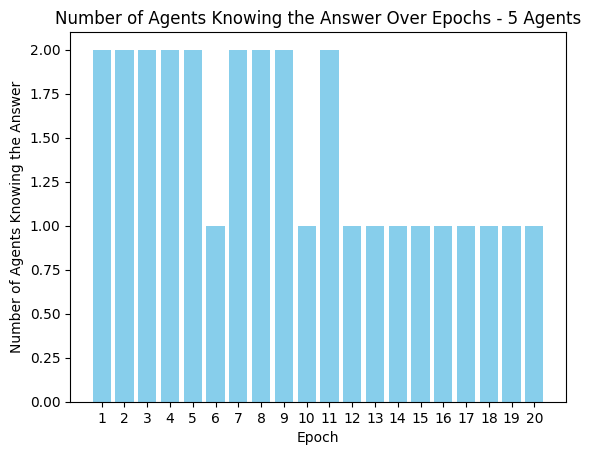

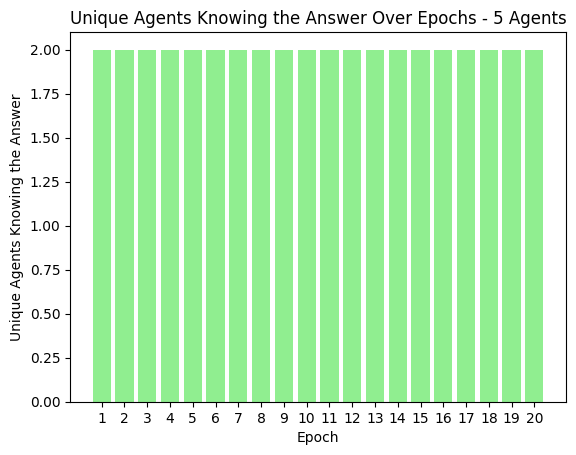

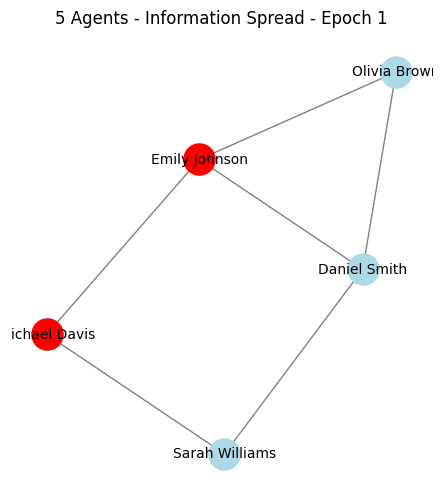

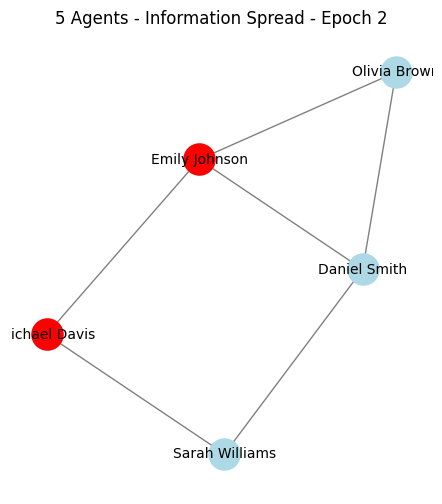

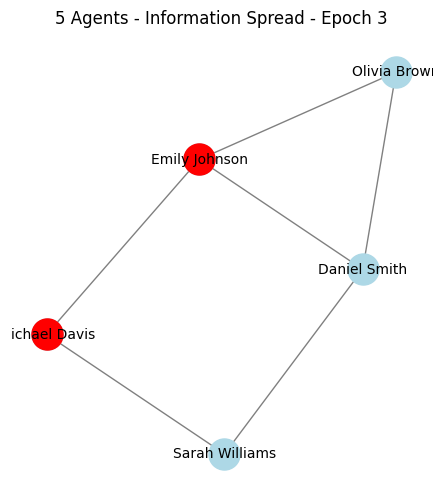

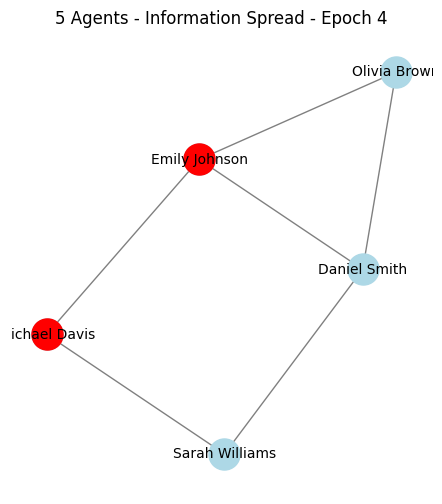

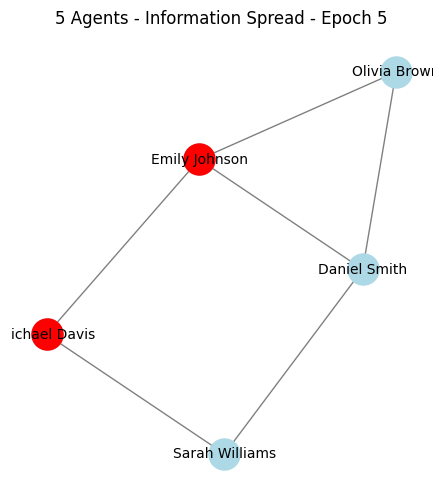

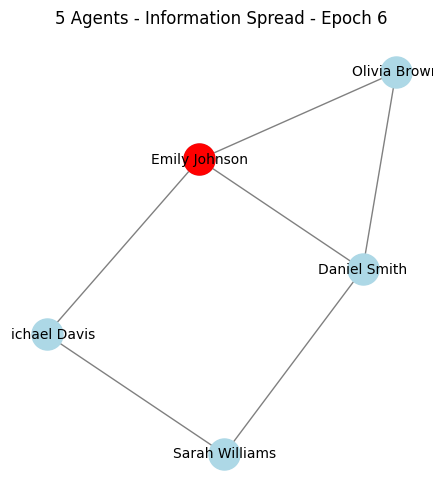

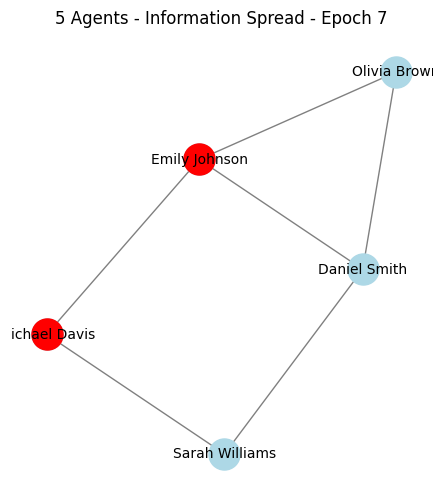

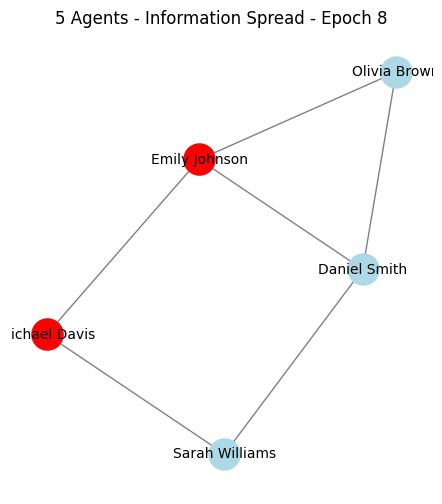

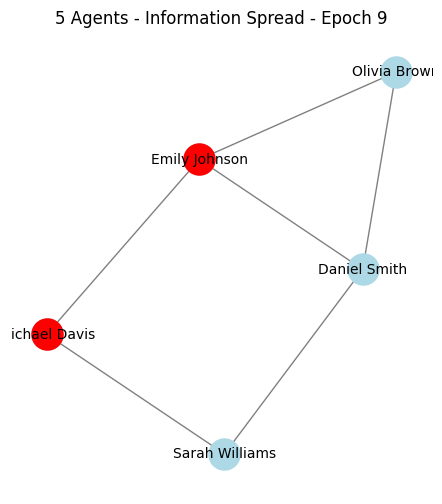

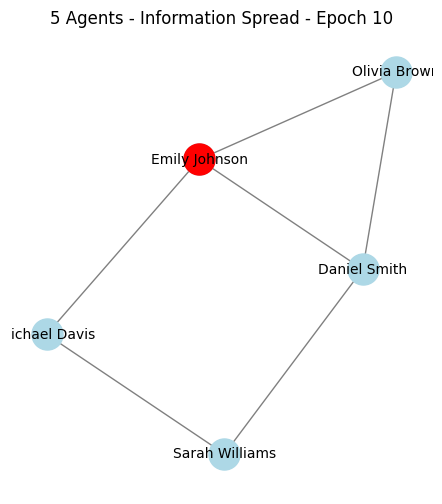

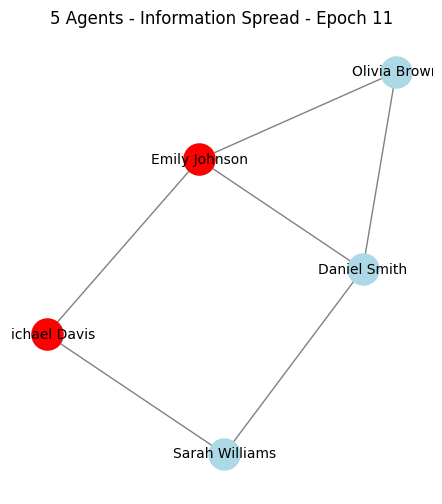

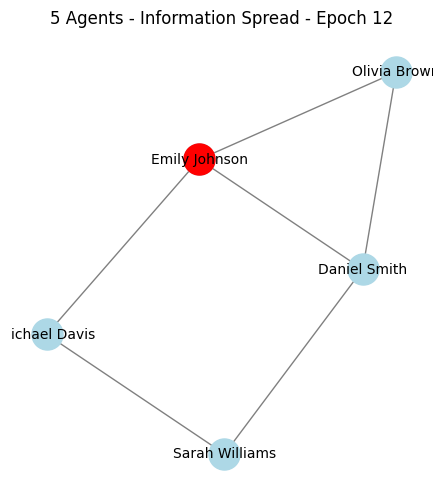

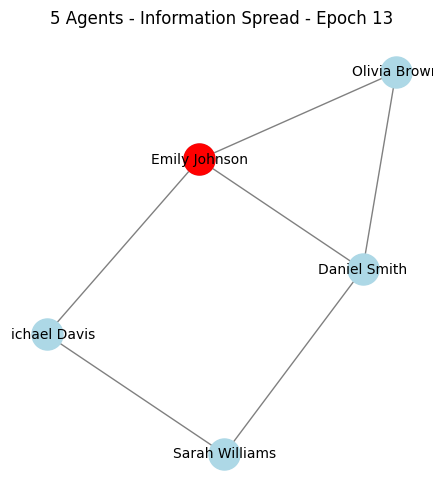

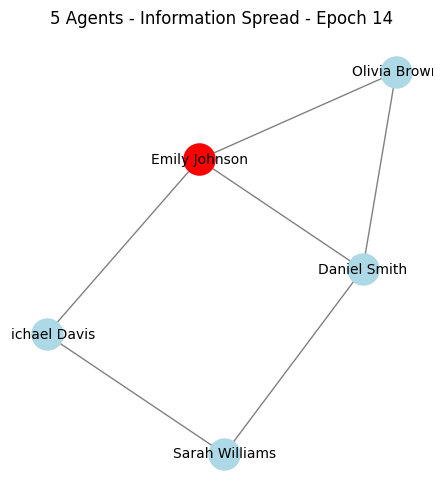

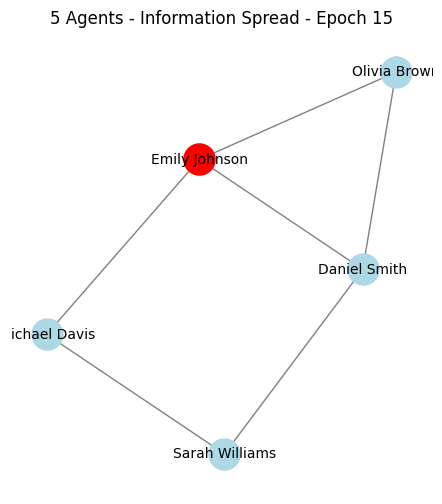

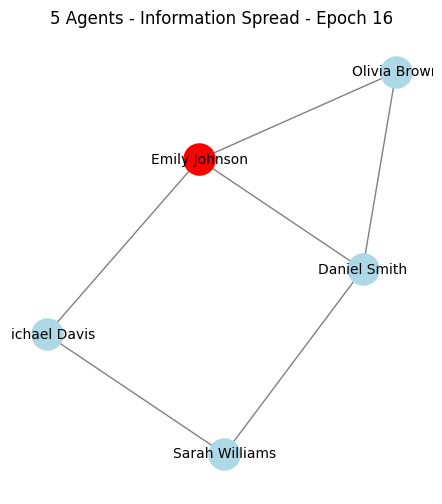

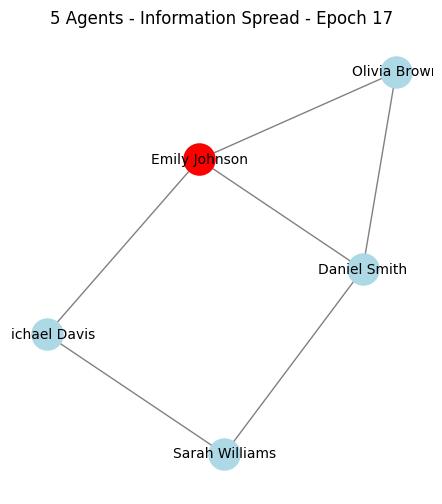

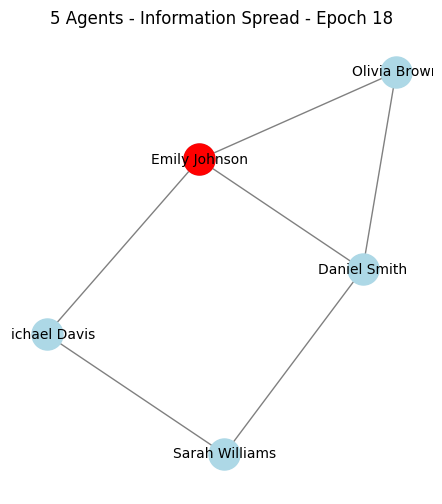

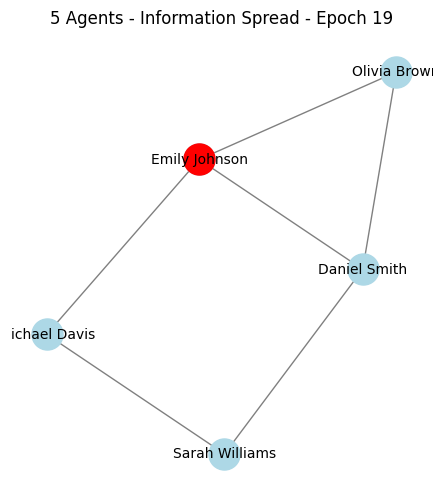

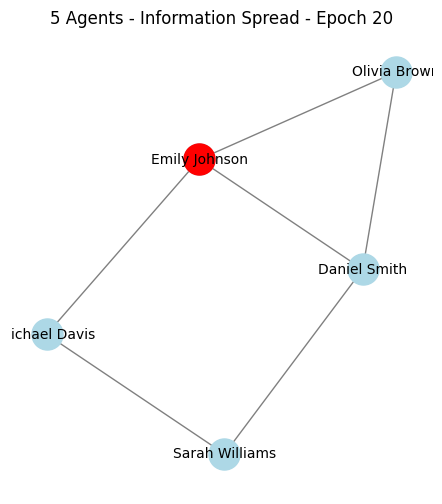

In [91]:
process_experiment(result5_reduced_prompt, result5_graph, result5_pos)

## 5 agents - used Simple memory


In [92]:
get_information_about_dataset_result(result5_simple, result5_graph)

Seed Node: Emily Johnson (ID: 0)
Centrality: 0.7500
Degree of seed node: 3
Average Degree: 2.40
Number of Agents: 5
Number of Edges: 6
Prompt Processing Time: 3,170.69 seconds
Number of Epochs: 20
Number of Utterances: 100
Total Tokens: 2,569,382
Total Completion Tokens: 156,799
Average Tokens per Request: 2654.32
Average Completion Tokens per Request: 161.98
Tokens per Second: 49.45 TPS
Total Requests: 968



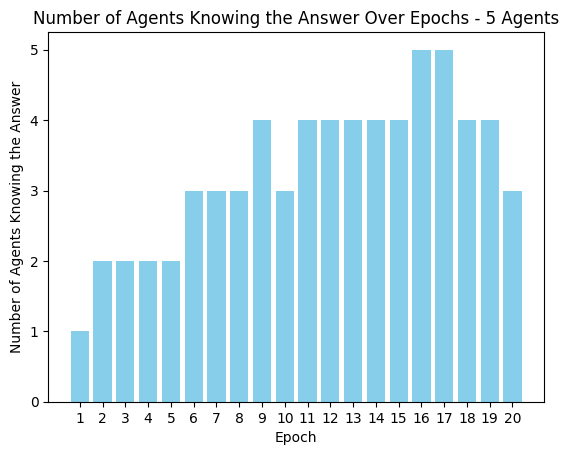

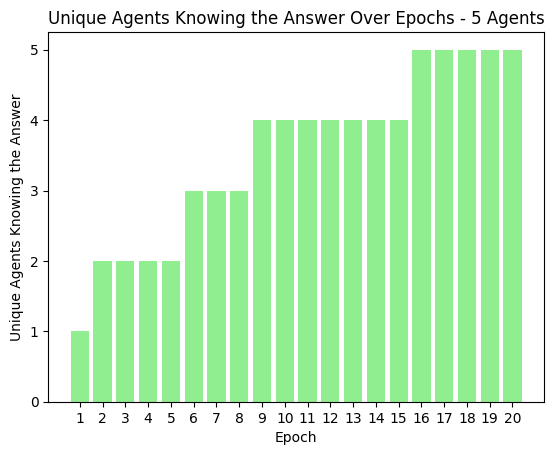

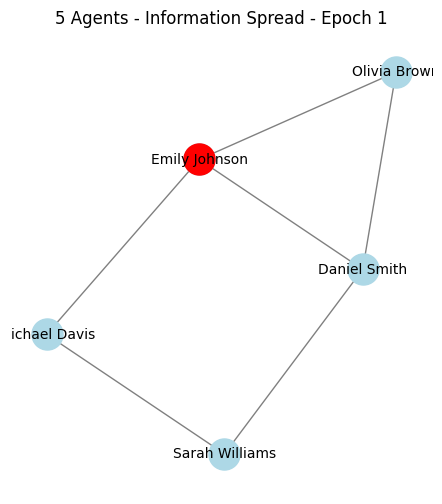

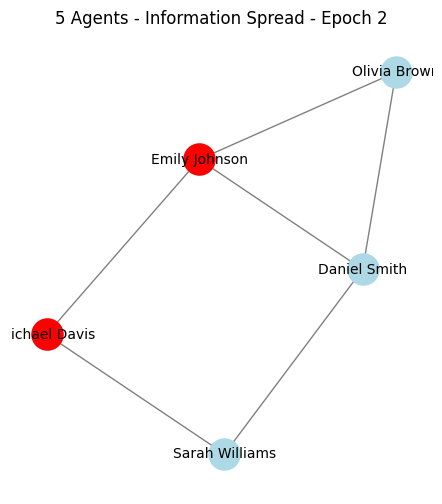

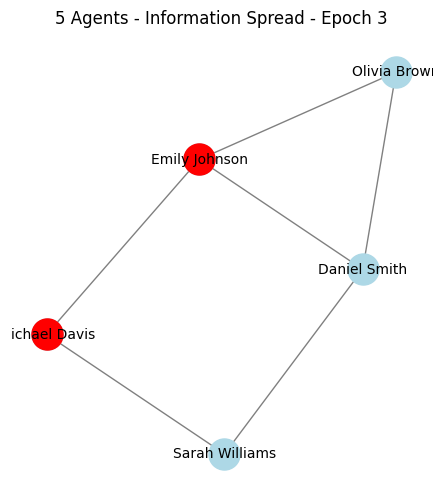

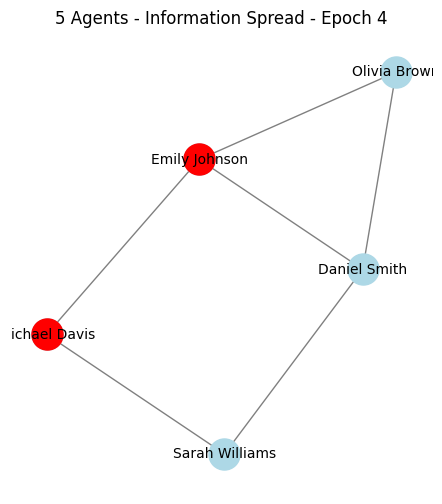

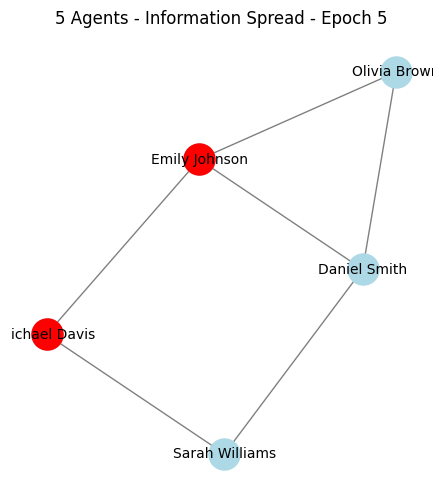

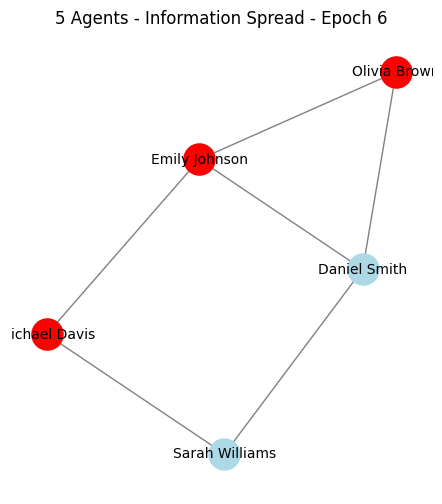

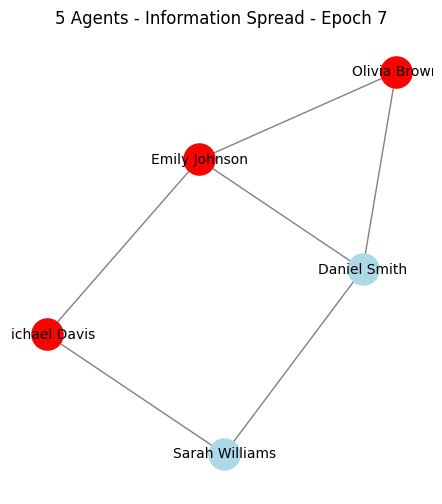

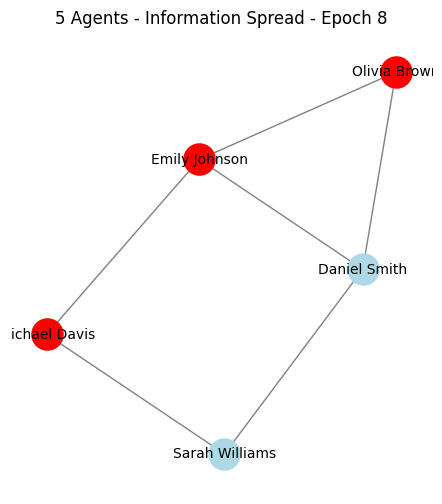

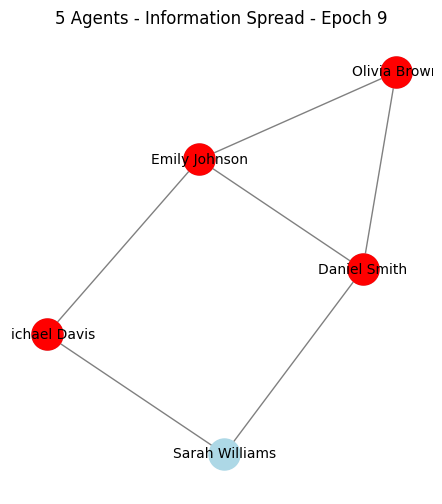

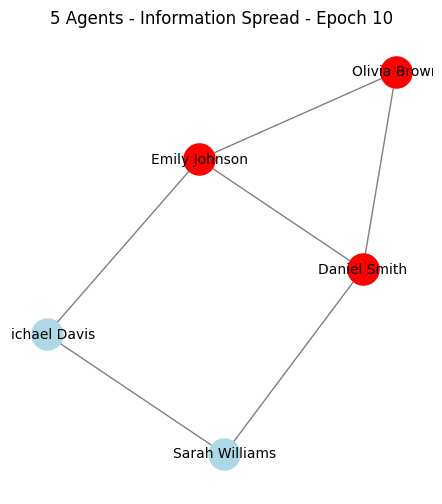

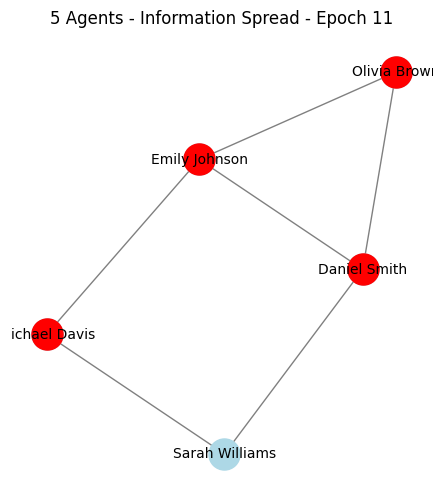

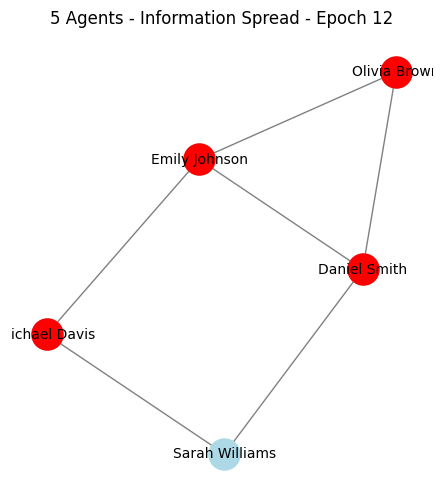

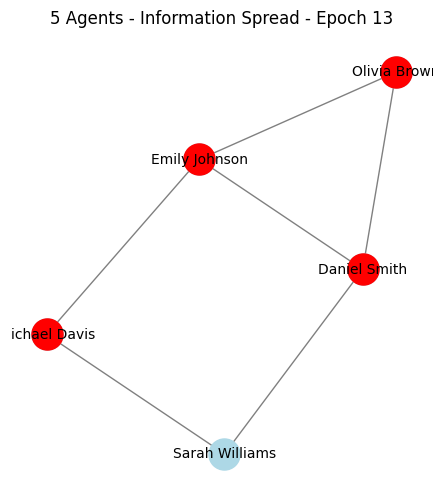

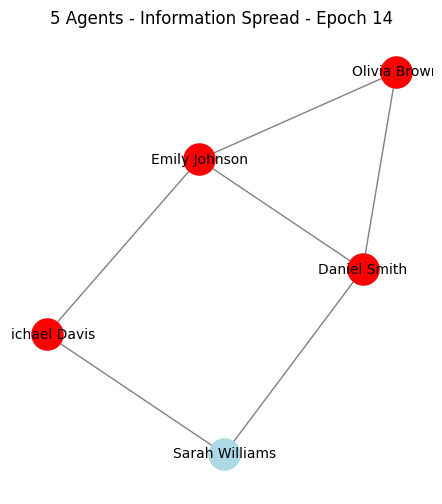

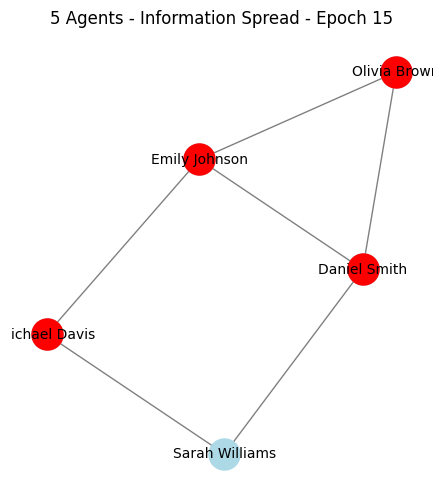

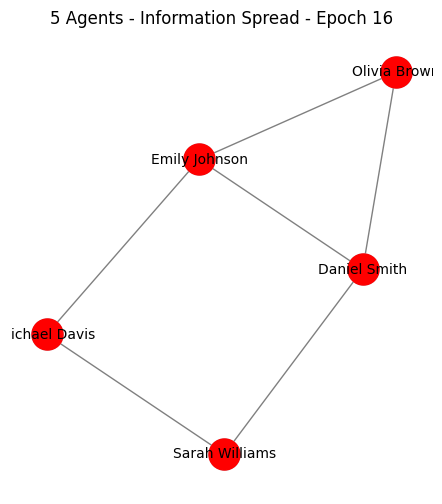

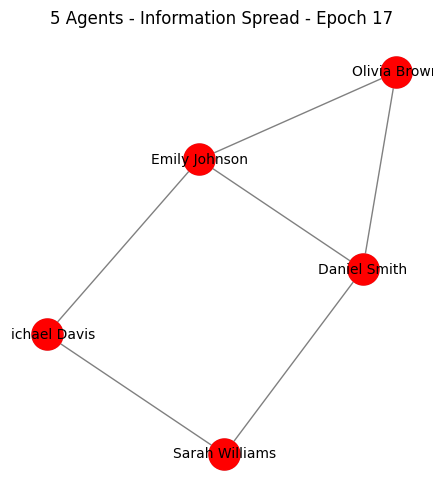

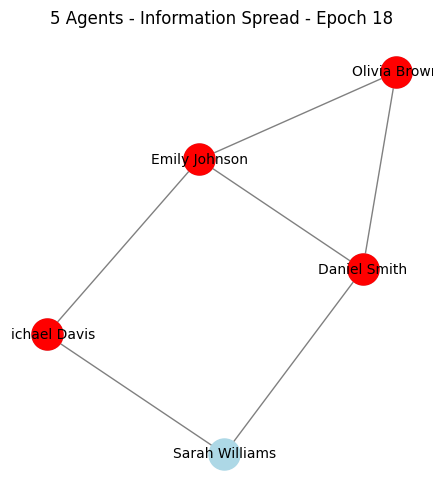

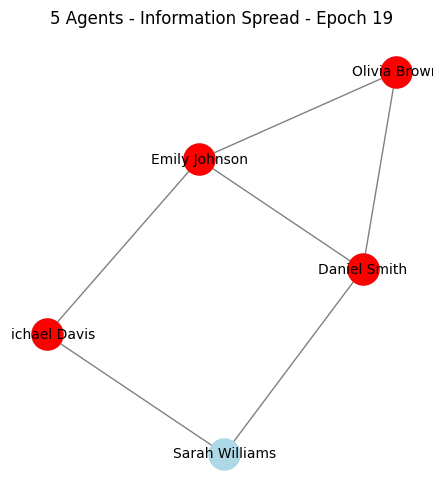

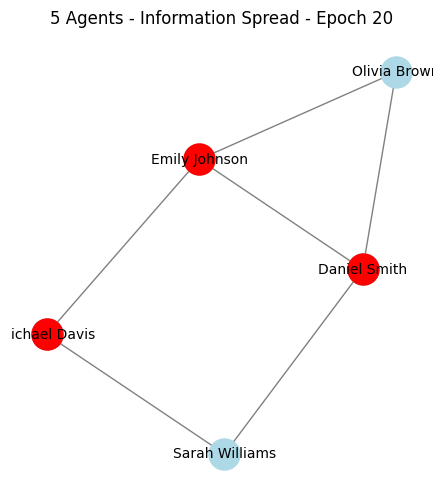

In [93]:
process_experiment(result5_simple, result5_graph, result5_pos)

## 10 agents


In [94]:
get_information_about_dataset_result(result10, result10_graph)

Seed Node: Emma Roberts (ID: 0)
Centrality: 0.6250
Degree of seed node: 5
Average Degree: 3.56
Number of Agents: 10
Number of Edges: 18
Prompt Processing Time: 58,158.77 seconds
Number of Epochs: 30
Number of Utterances: 300
Total Tokens: 11,331,425
Total Completion Tokens: 698,241
Average Tokens per Request: 2702.46
Average Completion Tokens per Request: 166.53
Tokens per Second: 12.01 TPS
Total Requests: 4193



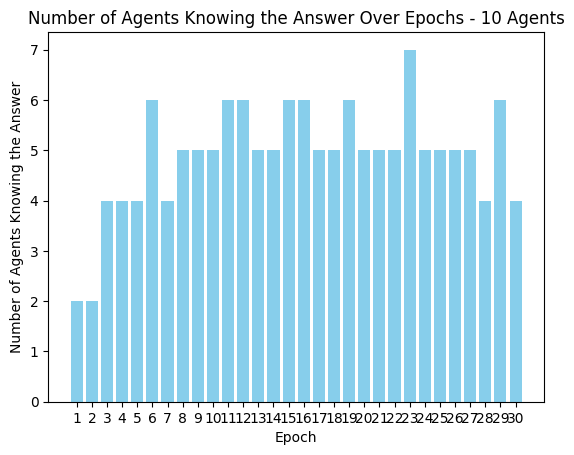

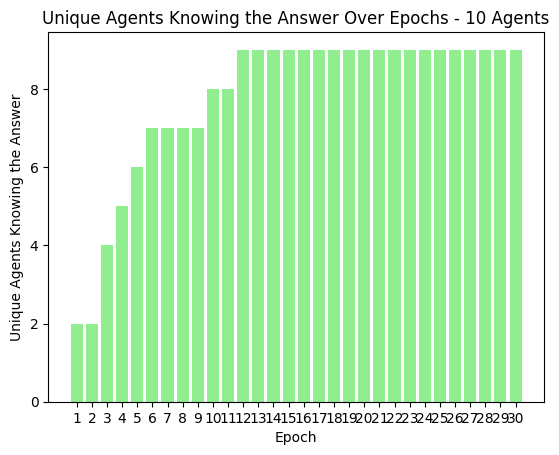

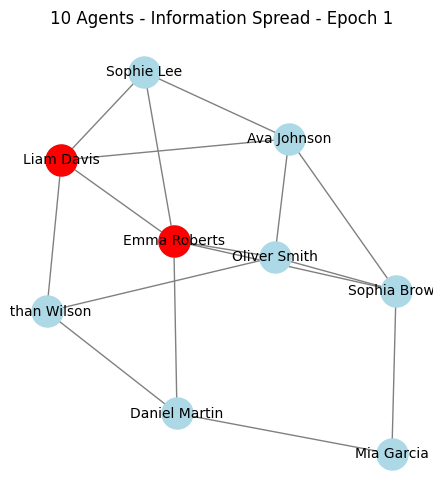

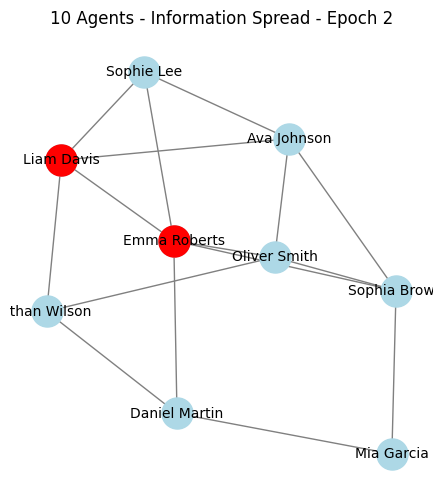

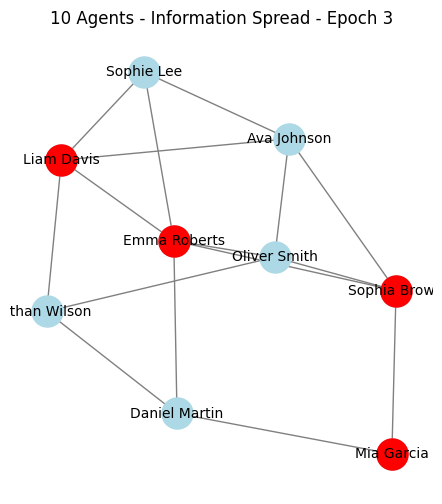

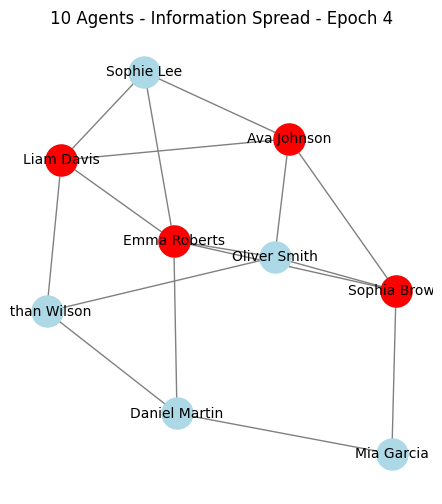

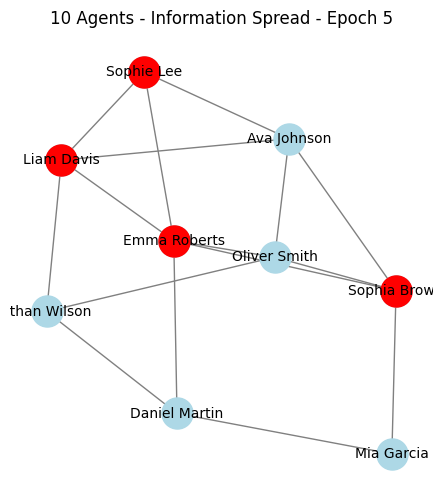

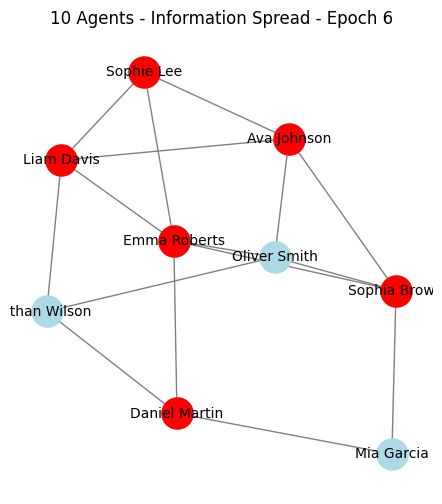

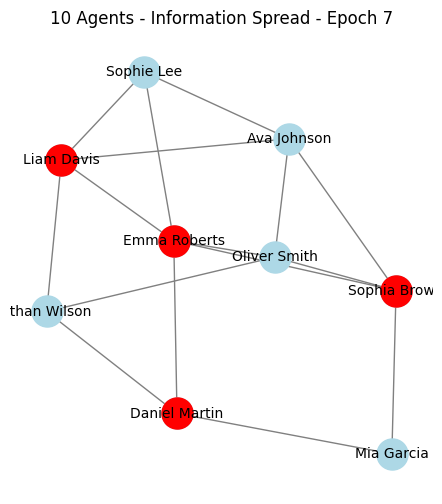

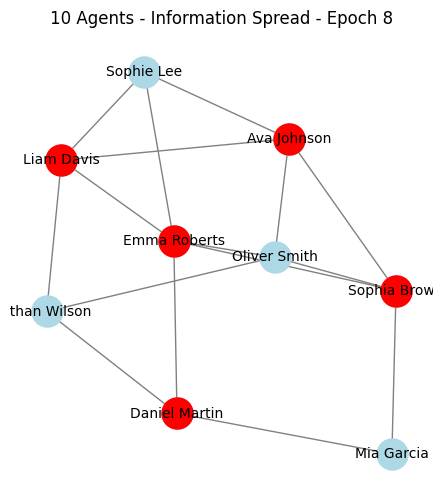

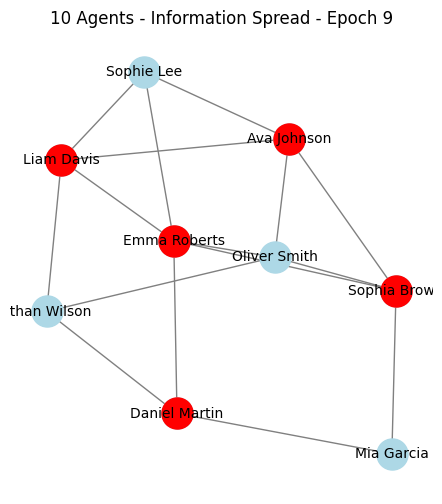

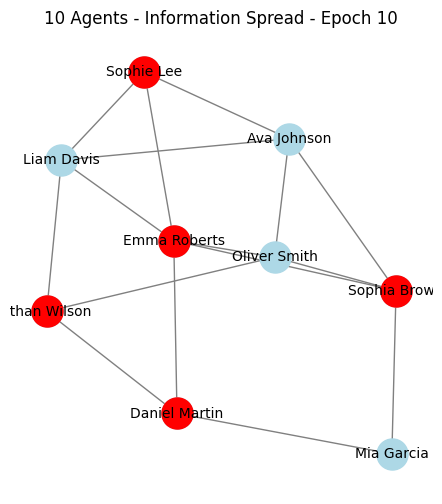

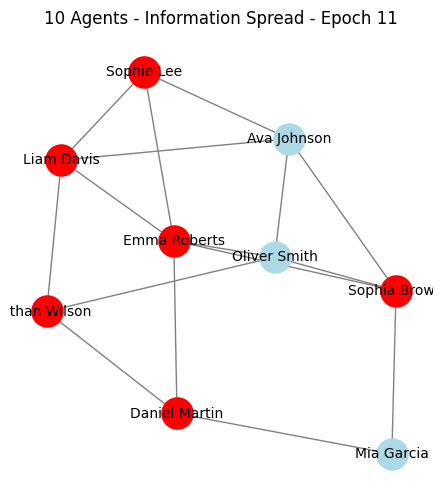

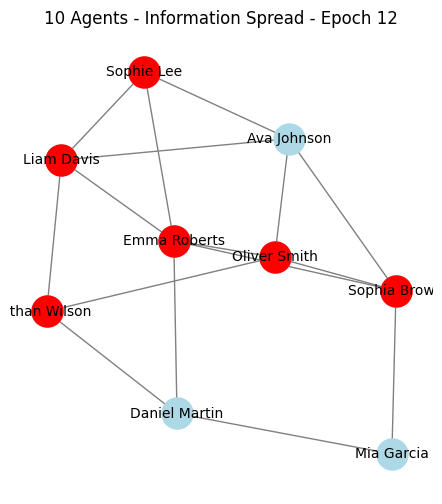

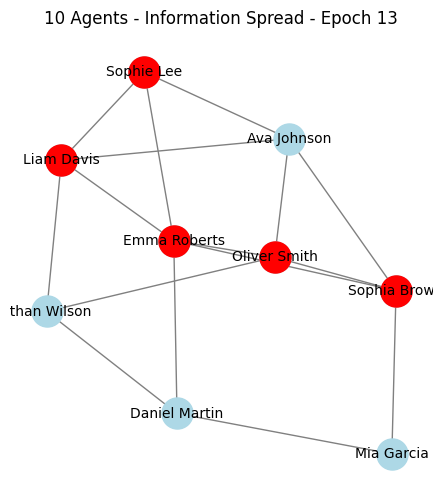

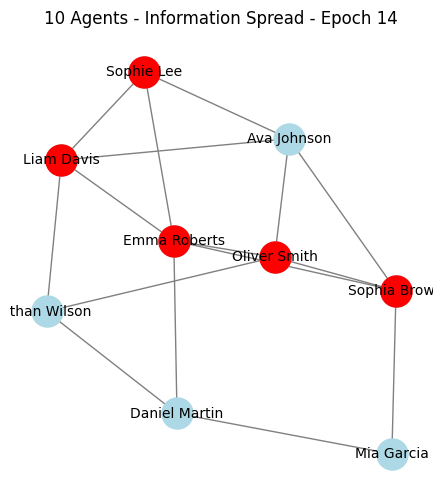

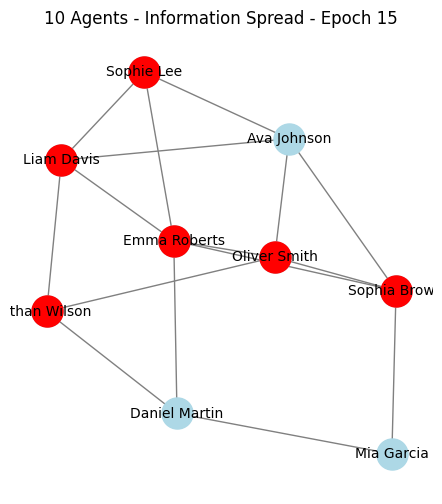

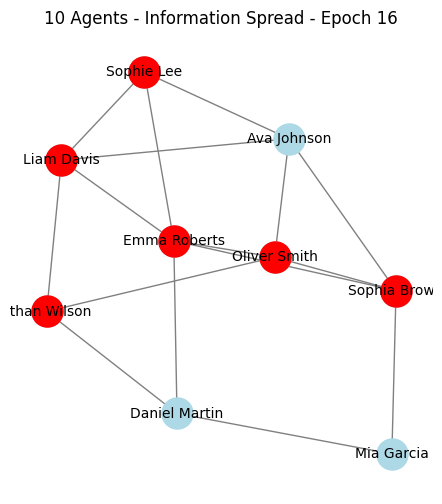

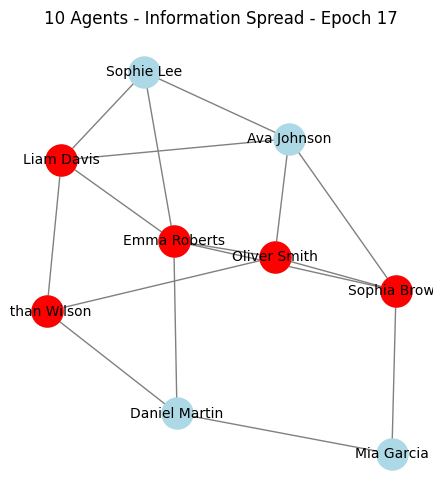

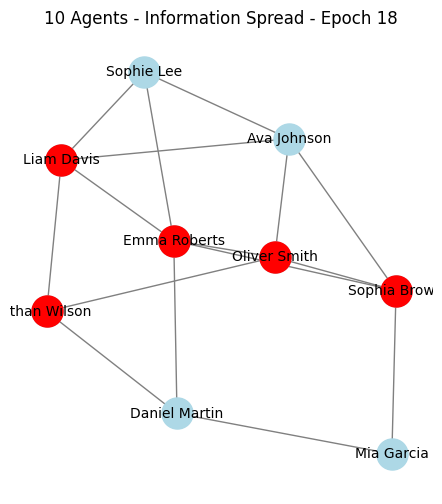

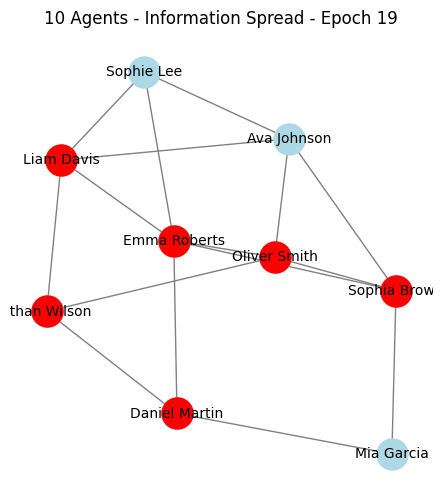

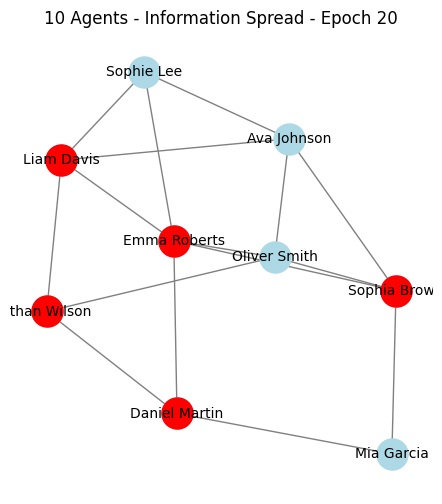

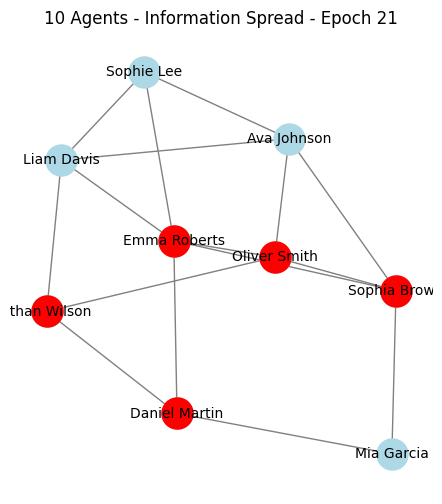

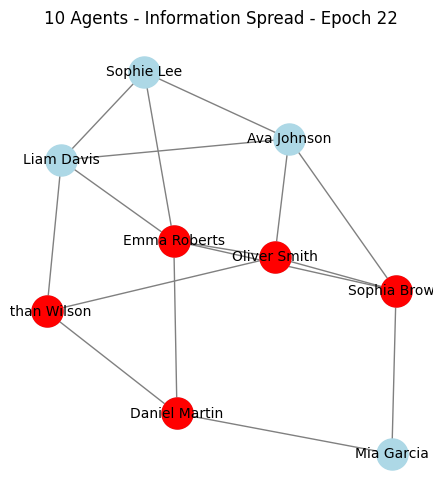

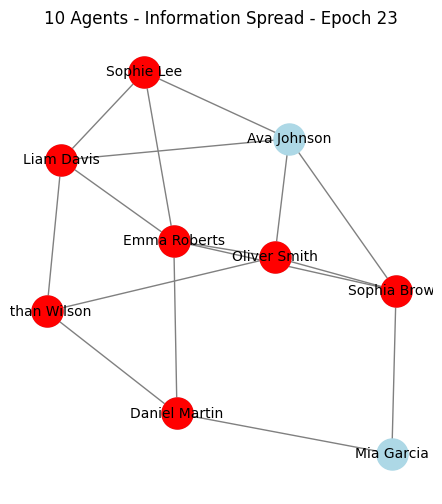

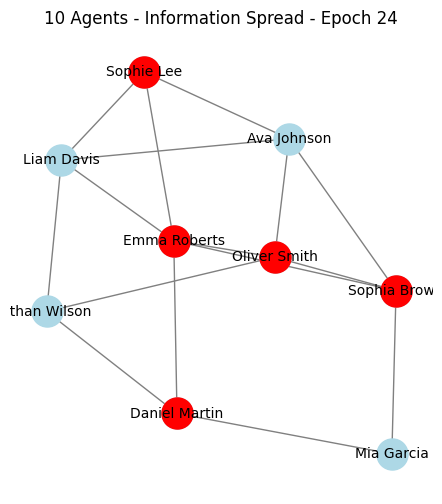

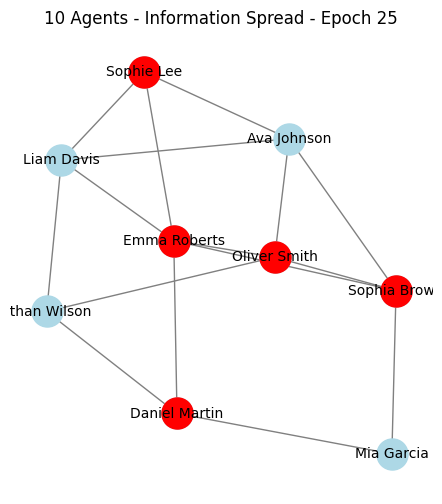

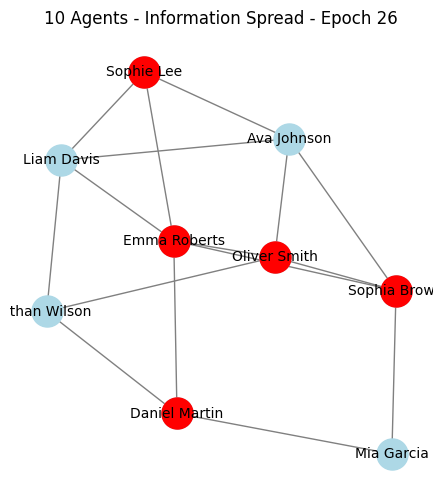

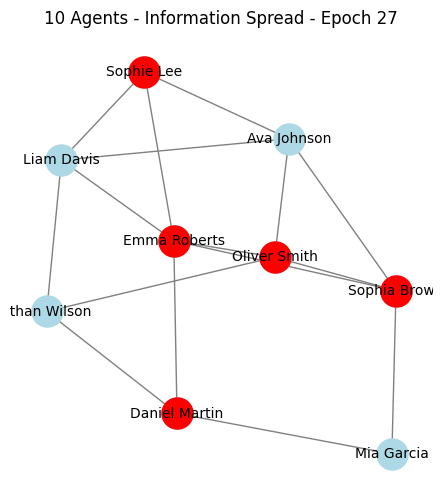

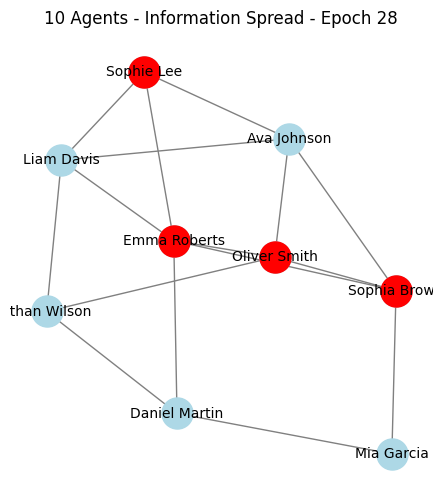

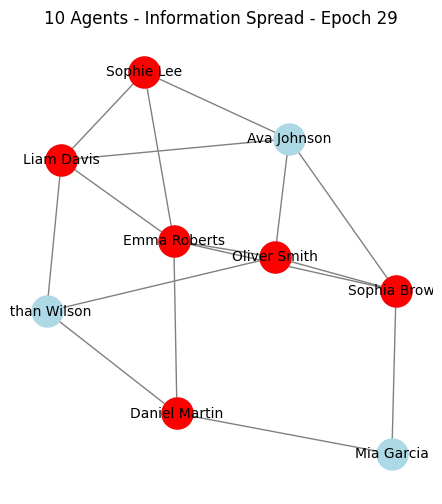

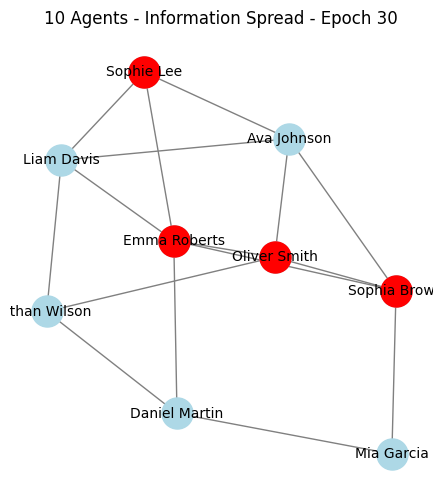

In [95]:
process_experiment(result10, result10_graph, result10_pos)

## 25 agents


In [96]:
get_information_about_dataset_result(result25, result25_graph)

Seed Node: Alexandra Moreno (ID: 0)
Centrality: 0.3333
Degree of seed node: 8
Average Degree: 3.84
Number of Agents: 25
Number of Edges: 48
Prompt Processing Time: 2,920.14 seconds
Number of Epochs: 15
Number of Utterances: 375
Total Tokens: 4,279,727
Total Completion Tokens: 341,322
Average Tokens per Request: 1900.41
Average Completion Tokens per Request: 151.56
Tokens per Second: 116.89 TPS
Total Requests: 2252



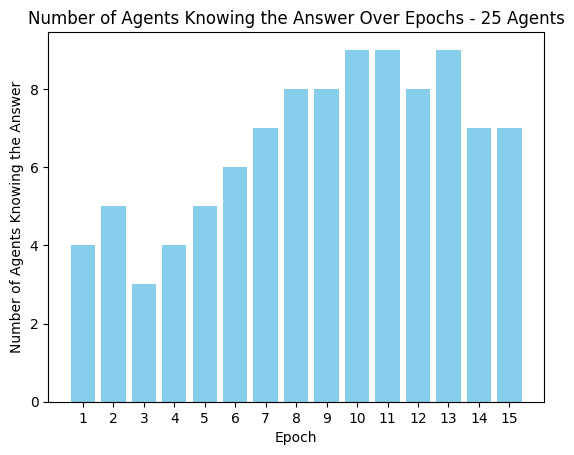

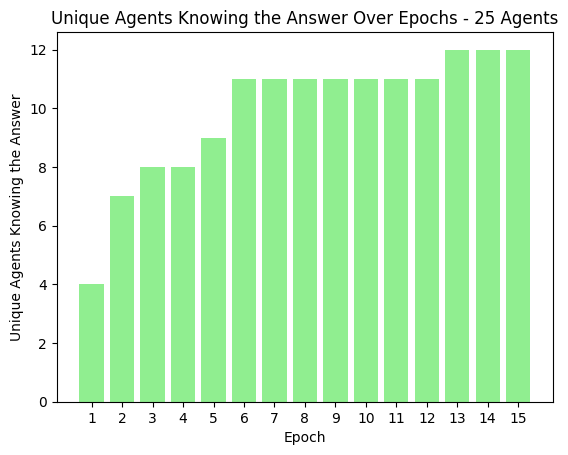

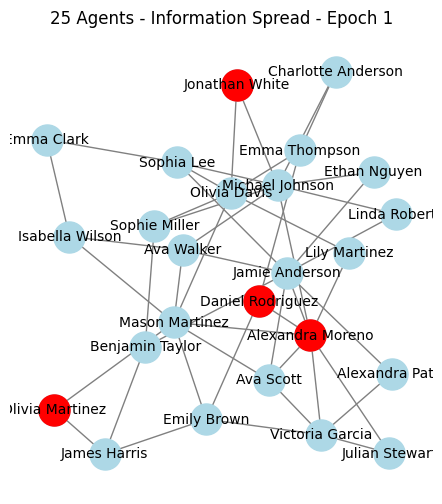

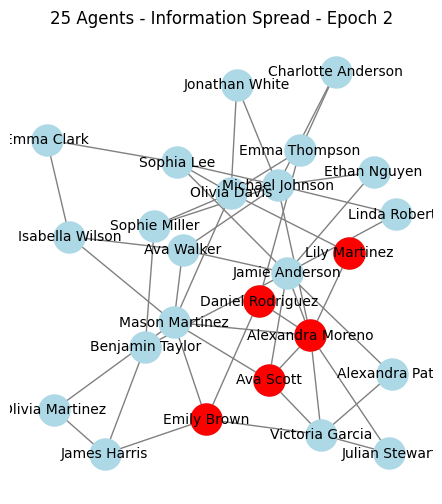

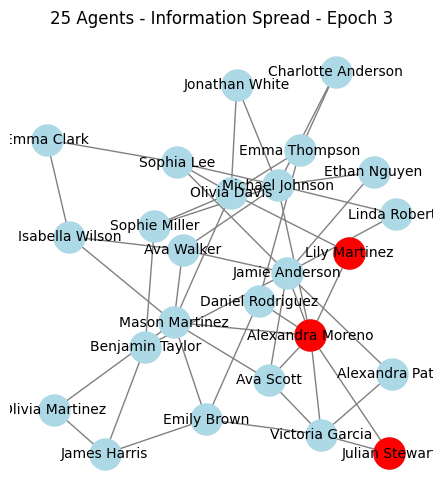

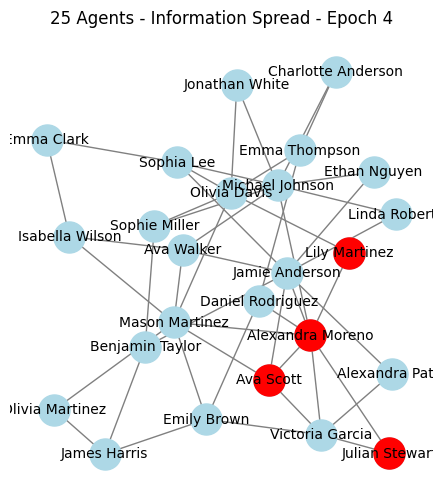

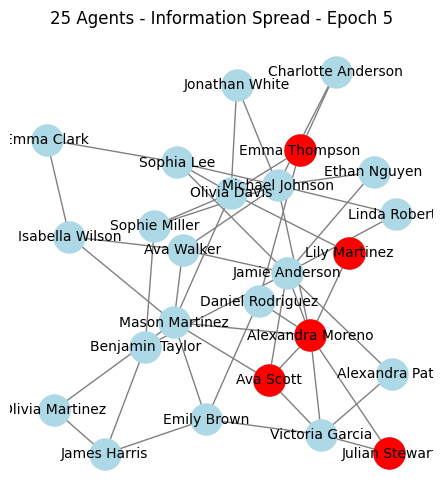

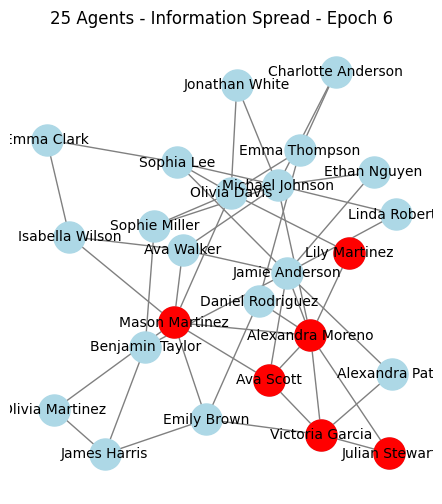

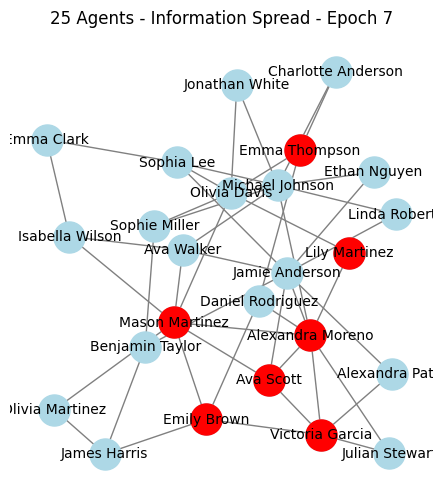

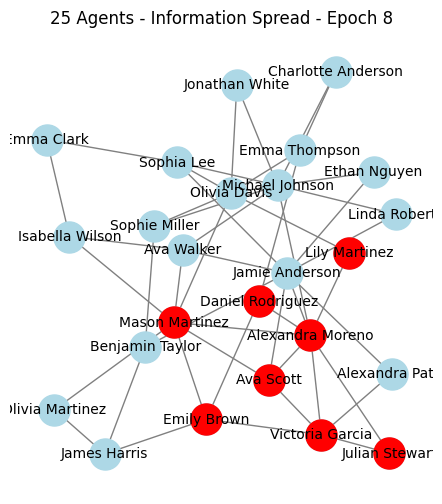

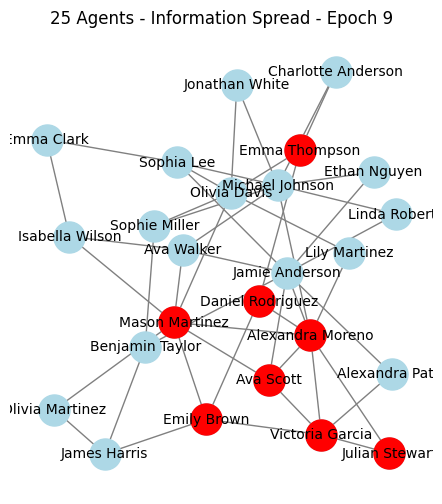

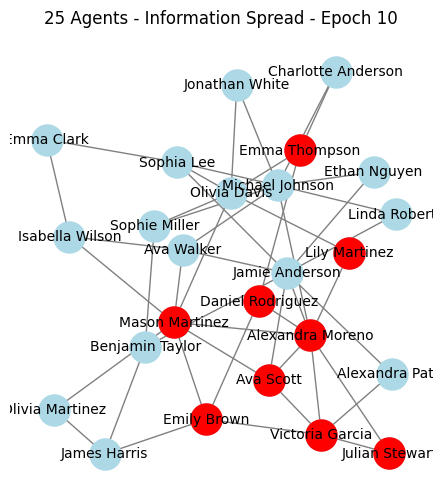

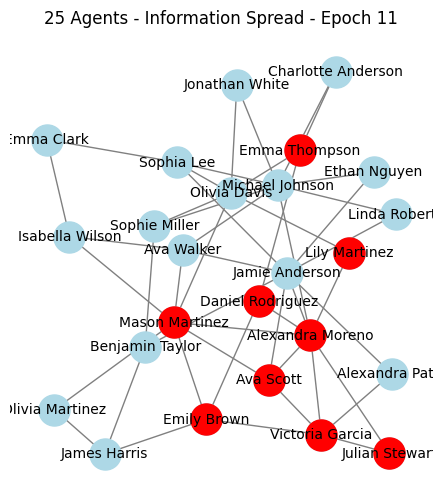

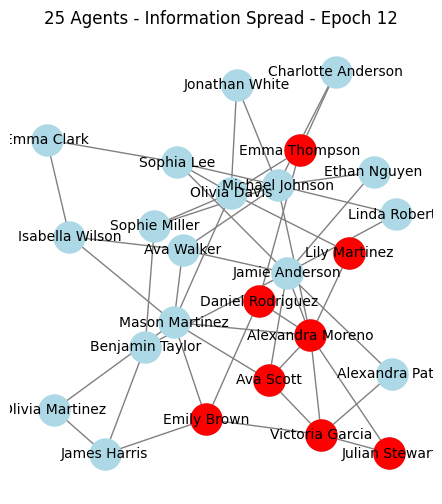

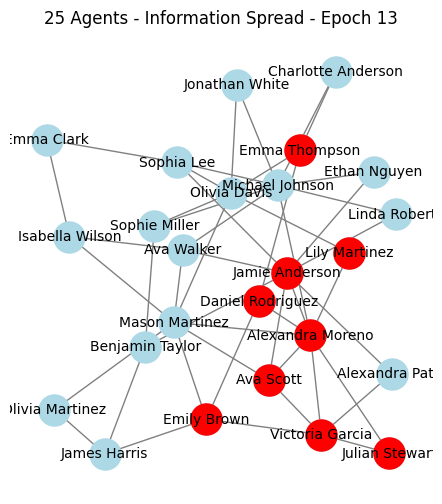

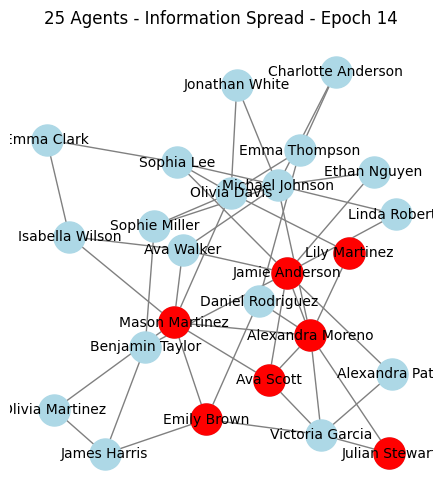

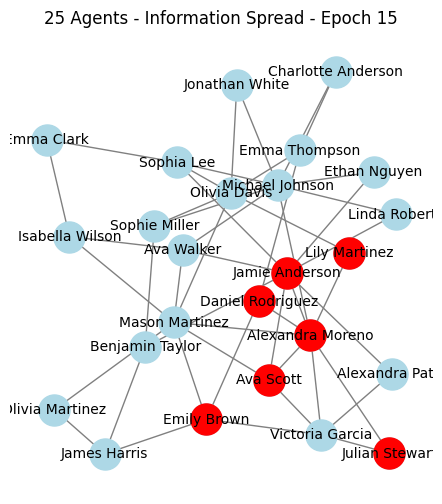

In [97]:
process_experiment(result25, result25_graph, result25_pos)

# Results and main findings


The experiments revealed several important insights about information spread in generative agent networks. Most notably, prompt engineering had a significantly greater impact on agent behavior than initially anticipated. Well-crafted prompts proved essential for effective information dissemination, as agents do not naturally engage in information-spreading behaviors without proper guidance.

The simple memory system showed considerable limitations in maintaining information integrity as the memory accumulated more data. This degradation likely occurs because information extraction becomes increasingly difficult when the memory is cluttered with multiple facts, which is particularly problematic since this memory type is designed to be non-forgetting.

The experimental results demonstrated high variability and dependence on random factors, making consistent outcomes difficult to achieve. Interestingly, smaller experiments consistently produced better and more stable results compared to larger network configurations. Even when scaling up to larger graphs, the information spread appears to reach a saturation point where further dissemination becomes increasingly constrained, regardless of the strategies employed.